Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)

In [1]:
import warnings #Code to remove warnings
warnings.filterwarnings('ignore')

## 1. Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import prettytable

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 2. Dataset Preprocessing

In [3]:
boston = load_boston() #loading boston housing dataset

In [4]:
print('Shape of dataset is:',boston.data.shape)#boston.data gives us an array. Here we are getting shape of boston array

Shape of dataset is: (506, 13)


In [5]:
bos = pd.DataFrame(boston.data,columns = boston.feature_names)#Here we are converting our array 'boston.data' into a dataframe-
#- and our column names are contained in 'boston.feature_names'
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos['Price'] = boston.target #boston.target contains our y_i's and hence we are now putting our y_i's into bos dataframe

In [7]:
x = bos.drop('Price',axis = 1)#Here we are splitting our dataset 'bos' into datapoint dataframe and y_i dataframe.
y = bos['Price']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y)#splitting our dataset into train and test

In [9]:
standardized_train = StandardScaler().fit_transform(x_train) #standardizing our training dataset
standardized_test = StandardScaler().fit_transform(x_test) #standardizing our test dataset

In [10]:
#Creating training dataframe which contains both datapoints and y_i's
d_train = pd.DataFrame(standardized_train)
d_train['Price'] = np.array(y_train)

#Creating test dataframe which contains both datapoints and y_i's
d_test = pd.DataFrame(standardized_test)
d_test['Price'] = np.array(y_test)

In [11]:
print(d_train.shape)
print(d_test.shape)

(379, 14)
(127, 14)


In [12]:
d_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,0.694276,-0.480911,0.998510,-0.248243,0.245557,-1.100563,0.071415,-0.828240,1.648985,1.537645,0.822072,-3.988520,0.637485,11.7
1,-0.390557,-0.480911,-0.186256,-0.248243,-0.073535,-0.321752,0.956263,-0.592255,-0.418155,0.143977,-0.300854,0.423459,0.627478,18.7
2,-0.048540,-0.480911,1.215253,-0.248243,0.426662,-0.308451,0.870633,-0.721134,-0.532996,-0.028742,-1.751300,-1.335050,-0.413303,25.0
3,-0.414197,0.981168,-0.760333,-0.248243,-1.056680,0.414203,-1.006101,0.841536,-0.303314,-0.469475,-1.096260,0.410557,-0.457622,22.0
4,-0.401406,-0.480911,-0.101316,-0.248243,-0.573731,-0.618793,-1.651898,0.088378,-0.647837,-0.779178,0.073454,0.423459,-0.261760,22.6


### 3. Custom implementation of SGDRegressor

In [13]:
def sgdreg_fit(x,alpha,batch_size=100, n_iter = 1000,eta0 = 0.01):
    
    #Here our learning rate == 'invscaling' and we have used L2 regularization 
    """This function is custom implementation of Stochastic Gradient Descent Regressor.
    
    Input: 
          
          x: This is our dataset on which we want to calculate our weights so that we can find a line which best fits-
              our x.
              
          alpha: This is our coefficient of L2 Regularizer.
          
          batch_size: This is the size of our batch of our datapoints which we randomly sample from our dataset 'x' at each-
                      -iteration.
                      
          n_iter: No. of iterations we want to perform.
          
          eta0: This is our learning rate.
        
    Output:
           
           This function return a dictionary containing weight and intercept corresponding to a particular alpha  value"""
    
    dict_1 = dict()#dictionary this function returns
    t = 1 #invscaling parameter and is given by t = n_iter*batch_size
    power_t = 0.25 #invscaling parameter which will be used as power of 't'
    eta = eta0 #learning rate
    
    w_old = np.zeros(shape = (1,13))#zero intitialization of our weights.
    b_old = 0 #zero initialization of our intercept term
    
    for i in range(n_iter):
        gradient_w = np.zeros(shape = (1,13)) #zero intitialization of gradient of loss term w.r.t w
        gradient_b = 0 #zero intitialization of gradient of loss term w.r.t b
        batch_data=x.sample(n = batch_size) #randomly sampling datapoints from dataset
        batch_x= np.array(batch_data.drop('Price',axis=1)) # separating our x_i's from batch dataset
        batch_y = np.array(batch_data['Price']) # separating our y_i's from dataset from batch dataset
        
        #Here we are calculating gradient of loss term w.r.t w and w.r.t b
        for j in range(batch_size):
            y = np.dot(w_old,batch_x[j])+b_old 
            gradient_w += (batch_x[j]*(batch_y[j]-y)) + 2*alpha*w_old
            gradient_b += (batch_y[j]-y)
       
        gradient_w *= (-2/batch_size)
        gradient_b *= (-2/batch_size)
        
        #updating our weights
        w_new = w_old - eta*gradient_w
        b_new = b_old - eta*gradient_b
        
        #updating our old weights
        w_old = w_new
        b_old = b_new
        eta = eta/pow(t,power_t) #Here we are updating our learning rate at each iteration
        t=(i*batch_size)+(alpha*eta0) #updating our invscaling parameter at each iteration
        
        #Here we are assigning values to various keys in the dictionary
        if i == (n_iter-1)  : 
            dict_1['alpha'] = alpha
            dict_1['weight'] = w_old
            dict_1['intercept'] = b_old
            break
    return dict_1


def sgdreg_predict(w,b,x):
    """This function will predict the y_i values corresponding to our query points.
        
       Input: This function takes 'w' which is the best weight on which our dataset has been trained. 
              This function also takes 'b' which is the best intercept term on which our dataset has been trained.
              'x' is our test dataset.
        
       Output: This function returns an array of predicted values.
       
    """
    y_pred = []
    for i in range(x.shape[0]):
        y_pred.append(np.dot(w,x[i])+b)
    return np.array(y_pred)

def error(y_true,y_pred):
    """This function calculates mean squared error"""
    error = mean_squared_error(y_true,y_pred)
    return error

def plot(y_true,y_pred):
    """This function plots y_pred as a function of y_true"""
    plt.figure()
    plt.scatter(y = y_pred,x = y_true,label = 'Actual values Vs Pred values')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Actual values Vs Pred values')
    plt.legend()
    plt.grid()
    plt.show() 

In [14]:
#Here we are performing cross validation w.r.t our training dataset using custom built SGD Regressor. Here our hyperparameters-
#- alpha and eta0.
error_i = []
err_1 = dict()
alpha = [10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,1,10**1,10**2,10**3,10**4,10**5,10**6]
eta0 = [10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,1,10**1,10**2,10**3,10**4,10**5,10**6]
for i in alpha:
    for j in eta0:
        sgd = sgdreg_fit(d_train,alpha = i,eta0 = j)#Fitting our training dataset
        y_pred = sgdreg_predict(sgd['weight'],sgd['intercept'],standardized_train) #predicting y_i's of train data using-
        # the weights that our model has learned.
        err = error(y_train,y_pred) #calculating our mean squared error
        error_i.append(err) #Appending our errors
        err_1[err] = [i,j,err] #storing the mean squared error corresponding to a particular alpha and eta0 value.
        print('alpha = {0}, eta = {1}, mse = {2}'.format(i,j,err))

alpha = 1e-06, eta = 1e-06, mse = 585.5912974903646
alpha = 1e-06, eta = 1e-05, mse = 568.4120011329558
alpha = 1e-06, eta = 0.0001, mse = 477.42740964084373
alpha = 1e-06, eta = 0.001, mse = 185.4550531700009
alpha = 1e-06, eta = 0.01, mse = 537.4241268396811
alpha = 1e-06, eta = 0.1, mse = 9102493.203844715
alpha = 1e-06, eta = 1, mse = 8.009229853387747e+17
alpha = 1e-06, eta = 10, mse = 1.4330462550748914e+31
alpha = 1e-06, eta = 100, mse = 2.418153055558553e+44
alpha = 1e-06, eta = 1000, mse = 2.202044048965857e+60
alpha = 1e-06, eta = 10000, mse = 7.517358960021271e+76
alpha = 1e-06, eta = 100000, mse = 5.42896297609114e+95
alpha = 1e-06, eta = 1000000, mse = 6.164461811029461e+115
alpha = 1e-05, eta = 1e-06, mse = 588.0098637370008
alpha = 1e-05, eta = 1e-05, mse = 577.1803377850713
alpha = 1e-05, eta = 0.0001, mse = 522.5942352294663
alpha = 1e-05, eta = 0.001, mse = 304.980486739748
alpha = 1e-05, eta = 0.01, mse = 115.92005296807415
alpha = 1e-05, eta = 0.1, mse = 112224.7656

In [19]:
a = min(error_i)#Finding the alpha and eta0 values corresponding to minimum mean squared error
err_1[a]

[0.1, 0.1, 37.84139064712439]

In [20]:
#Here we are trying to predict the y_i's corresponding to x_i's of test dataset using our best fit model above
sgd = sgdreg_fit(d_train,alpha = 0.1,eta0 = 0.1)
y_pred = sgdreg_predict(sgd['weight'],sgd['intercept'],standardized_test)

58.59034191193969


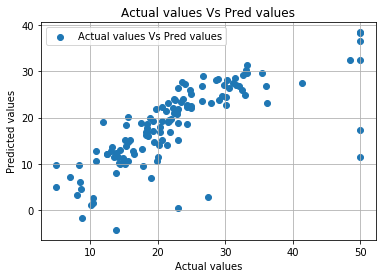

In [22]:
print(error(y_test,y_pred))
plot(y_test,y_pred)

#### Observation:
<pre>From above plot we can see that the actual values and predicted values are linearly aligned with each other which indicates that our custom model is predicting our actual values with very less error and is thus somewhat perfectly performing Stochastic Gradient Descent Regression.</pre>

In [23]:
w_1 = sgd['weight'] #weights corresponding to our best fit model
w_1

array([[ 0.38355789, -0.65461713, -0.54872229,  1.18067096, -0.61003668,
         3.54662039, -0.34283599, -0.79518735, -1.05936229, -0.67868092,
        -1.81454486,  0.96494767, -2.69118232]])

### 4. Sklearn SGDRegressor

In [24]:
mse = make_scorer(mean_squared_error) #As mean_squared_error is not a scoring parameter in Grid Search CV therefor we are-
#- using make_score to make mean_squared_error as one of the scoring parameters.

In [25]:
#Here we are performing gridsearch cross validation on our dataset for our sgd regressor
sgd = SGDRegressor(max_iter = 1000)
param_grid = {'alpha':[10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,1,10**1,10**2,10**3,10**4,10**5,10**6],
              'eta0':[10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,1,10**1,10**2,10**3,10**4,10**5,10**6]
             }
gscv = GridSearchCV(sgd,param_grid,cv = 10,scoring = mse,verbose = 1)
gscv.fit(standardized_train,y_train)
print('*'*20)

Fitting 10 folds for each of 169 candidates, totalling 1690 fits
********************


[Parallel(n_jobs=1)]: Done 1690 out of 1690 | elapsed:  1.5min finished


In [26]:
df = pd.DataFrame(gscv.cv_results_)#Converting our grid search cross validation results into dataframe
print(df['mean_test_score'].min()) #Here we are trying to get the minimum mean squared error
best_df = df[df['mean_test_score']==[df['mean_test_score'].min()]] #Here we are tring to get the entire datapoint corresponding-
#- to the min mean_squared_error.
best_df

20.687995052417175


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_eta0,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
56,0.049928,0.000303,20.687995,18.543505,0.01,0.01,"{'eta0': 0.01, 'alpha': 0.01}",169,36.317707,16.836803,...,10.782786,19.542829,17.750613,18.83383,20.281476,18.631596,0.001803,0.00006,8.070575,0.862831


In [27]:
index = best_df['param_alpha'].index #Getting index corresponding to best values of hyperparameters which result in min error
index[0]

56

In [28]:
print('Best hyperparameters are: alpha = {0} and eta0 = {1}'.format(best_df['param_alpha'][index[0]],best_df['param_eta0'][index[0]]))

Best hyperparameters are: alpha = 0.01 and eta0 = 0.01


In [29]:
#Here we are testing our model that we learnt above on our test dataset
sgd = SGDRegressor(alpha = 0.01,eta0 = 0.01,max_iter = 1000)
sgd.fit(standardized_train,y_train)
y_pred = sgd.predict(standardized_test)

33.651453623469465


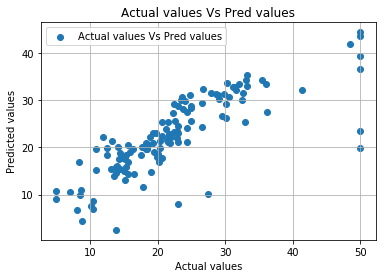

In [30]:
print(error(y_test,y_pred))
plot(y_test,y_pred)

#### Observation:
<pre>The above graph that we have got using sklearns Stochastic Gradient Descent Regressor model is very much similar to our plot that we got using custom implementation.</pre>

In [31]:
w_2 = sgd.coef_ #weights corresponding to our best fit model
w_2

array([-0.75595421,  0.78835386,  0.08226338,  0.62230719, -1.85857673,
        3.6593889 , -0.44289959, -2.70376005,  1.70737974, -1.63573206,
       -1.92452995,  0.82438522, -2.63974891])

In [32]:
np.linalg.norm(w_1-w_2) #Calculating euclidean distance between the weight vectors we got using sklearn sgd regressor and our-
#- own custom implementation.

4.233214598939649

<pre>From above we can see that the weight vectors that we got using Custom implementation and sklearns implementation are very close to each other in 13 dimensional space as the distance between them is only 4.23 units.</pre>

## 5. Conclusion

In [33]:
x = prettytable.PrettyTable()
list_1 = [['Custom SGDRegressor',58.59,[ 0.38355789, -0.65461713, -0.54872229,  1.18067096, -0.61003668,
         3.54662039, -0.34283599, -0.79518735, -1.05936229, -0.67868092,
        -1.81454486,  0.96494767, -2.69118232],4.23,0.1,0.1],['Sklearn SGDRegressor',33.65,[-0.75595421,  0.78835386,  0.08226338,  0.62230719, -1.85857673,
        3.6593889 , -0.44289959, -2.70376005,  1.70737974, -1.63573206,
       -1.92452995,  0.82438522, -2.63974891],4.23,0.01,0.01]]
names = ['Regressor', 'MSE', 'Weight', 'Distance','alpha','learning_rate']
pd.DataFrame(list_1,columns = names)

,Regressor,MSE,Weight,Distance,alpha,learning_rate
0,Custom SGDRegressor,58.59,"[0.38355789, -0.65461713, -0.54872229, 1.18067...",4.23,0.10,0.10
1,Sklearn SGDRegressor,33.65,"[-0.75595421, 0.78835386, 0.08226338, 0.622307...",4.23,0.01,0.01


<pre>From above table we can see that our weight vectors that we got using custom sgd regressor implementation and sklearns sgd regressor implementation are very close to each other as the distance between them is only 4.23 units which means that both the weights vectors are very similar to each other. This fact is also reflected in the mean squared error values which we got for both of these weight vectors. With Custom SGD Regressor we got best fit model for alpha = 0.1 and eta ( or learning_rate) = 0.1. Where as for Sklearns sgd we got best fit model for alpha = 0.01 and eta = 0.01. </pre>